<a href="https://colab.research.google.com/github/ecandes/stat318/blob/master/Fern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A beautiful thing 

We write a routine to generate samples of the Markov chain over ${\mathbb R}^2$
$$
X_{t+1}  = A_{\theta_{t+1}} X_t + b_{\theta_{t+1}}
$$ 
where the $\theta_t$'s are iid with probability 
$$
P(\theta = 1) = .01, \quad P(\theta = 2) = .07,  
\quad P(\theta = 3) = .07, \quad P(\theta = 4) = .85
$$
and the matrices and vectors are 
$$
A_1 = \begin{bmatrix} 0 & 0\\
0 & 0.16 \end{bmatrix} \quad 
A_2 = \begin{bmatrix} 0.2 &  -0.26\\ 0.23 & 0.22 
\end{bmatrix} \quad A_3 = \begin{bmatrix} -0.15 & 0.28\\
0.26 & 0.24 \end{bmatrix} \quad 
A_4 = \begin{bmatrix} 0.85 &  0.04\\ -0.04 & 0.85 
\end{bmatrix} 
$$
and 
$$
b_1 =  \begin{bmatrix} 0 \\ 0 \end{bmatrix}, \quad 
b_2 =  \begin{bmatrix} 0 \\ 1.6 \end{bmatrix}, 
b_3 =  \begin{bmatrix} 0 \\ .44 \end{bmatrix}, \quad 
b_4 =  \begin{bmatrix} 0 \\ 1.6 \end{bmatrix}
$$
Plot sample paths starting from $X_0 = (0,0)$. What is this thing? 


In [0]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np

Make problem data

In [0]:
#%%
A = {1:np.array([[0,0],[0, 0.16]]),
     2:np.array([[0.2,-0.26],[0.23, 0.22]]),
     3: np.array([[-0.15,0.28],[0.26, 0.24]]),
     4:np.array([[0.85,0.04],[-0.04, 0.85]])
     }

b = {1:np.array([0,0]),
     2:np.array([0, 1.6]),
     3:np.array([0, 0.44]),
     4:np.array([0, 1.6])
     }

pi = {1:0.01,
      2:0.07,
      3:0.07,
      4:0.85
      }


Generate sample path

In [0]:
from scipy.stats import multinomial
nsteps = int(1e5)
theta = multinomial.rvs(1, [prob for prob in pi.values()],nsteps)
X = np.zeros((nsteps+1,2))
for k in range(nsteps):
    state = np.dot(theta[k],np.arange(1,5))
    X[k+1] = A[state]@X[k] + b[state]


Plot sample path

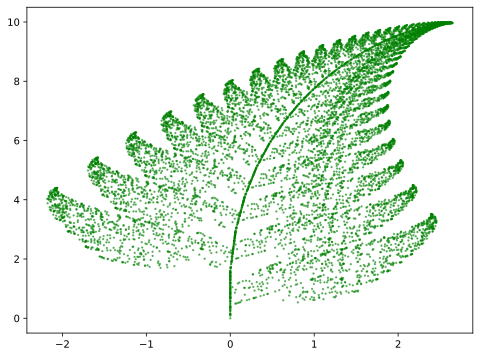

In [0]:
B = int(1e4)

plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(X[:B,0], X[:B,1], s= 2, alpha = 0.5, color='green')
plt.show()